# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from time import time

# Set environment variables
import os

os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["GAUGE_GROUP"] = "sl2c"
os.environ["PRECISION"] = "single"

# Add cle_fun to PYTHON_PATH
import sys
sys.path.append("../../../cle_fun")
from cle_fun.utils import moving_average

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath, mathrsfs}')

# NOTE: auto correlation length (acl) was calculated separately using runs were each CL step was tracked

Using Numba
Using SL(2,C)
Using single precision
Using single precision


# Figure 2 a)

In [2]:
res_keys = [
    "theta",
    "tr_avg_spat_plaq",
]

In [3]:
acl = {}
acl["euclidean"] = 0.32
acl["unstable_tan2"] = 1.0
acl["unstable_tan1"] = 1.0
acl["unstable_tan05"] = 1.0
acl["tan2_gc"] = 0.15
acl["tan1_gc_ds"] = 0.06
acl["tan05_gc_ds"] = 0.025

In [4]:
dict_results = {}
sim_names = ["unstable_tan2", "unstable_tan1", "unstable_tan05", "euclidean", "tan2_gc", "tan1_gc_ds", "tan05_gc_ds"]
figure_path = "./figure2"
for sim_name in sim_names:
    dict_results[sim_name] = {}
    for res_key in res_keys:
        dict_results[sim_name][res_key] = np.load(f"{figure_path}/{sim_name}_{res_key}.npy")

In [5]:
for sim_name in tqdm(sim_names):
    th = dict_results[sim_name]["theta"]
    plaq = dict_results[sim_name]["tr_avg_spat_plaq"]

    if "unstable" not in sim_name:
        th, plaq = moving_average(th, plaq, abs_step_size=0.01, abs_win_size=0.05)
    else:
        th, plaq = moving_average(th, plaq, abs_step_size=0.01, abs_win_size=0.05)

    dict_results[sim_name]["theta"] = th
    dict_results[sim_name]["tr_avg_spat_plaq"] = plaq

100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


In [6]:
plt_args = {}
lw = 2
plt_args["euclidean"] = {"label": r"$\mathrm{Euclidean}$", "c": "k", "ls": "solid", "zorder": 10, "linewidth": 10, "alpha": 0.25}
plt_args["unstable_tan2"] = {"label": r"$\tan(\alpha)=2.0$", "c": "red", "ls": "dotted", "lw": lw}
plt_args["unstable_tan1"] = {"label": r"$\tan(\alpha)=1.0$", "c": "navy", "ls": "dotted", "lw": lw}
plt_args["unstable_tan05"] = {"label": r"$\tan(\alpha)=0.5$", "c": "olive", "ls": "dotted", "lw": lw}
plt_args["tan2_gc"] = {"label": r"$\tan(\alpha)=2.0 ~ \mathrm{(GC)}$", "c": "red", "ls": "solid", "lw": lw}
plt_args["tan1_gc_ds"] = {"label": r"$\tan(\alpha)=1.0  ~ \mathrm{(GC+DS)}$", "c": "navy", "ls": "solid", "lw": lw}
plt_args["tan05_gc_ds"] = {"label": r"$\tan(\alpha)=0.5 ~ \mathrm{(GC+DS)}$", "c": "olive", "ls": "solid", "lw": lw}

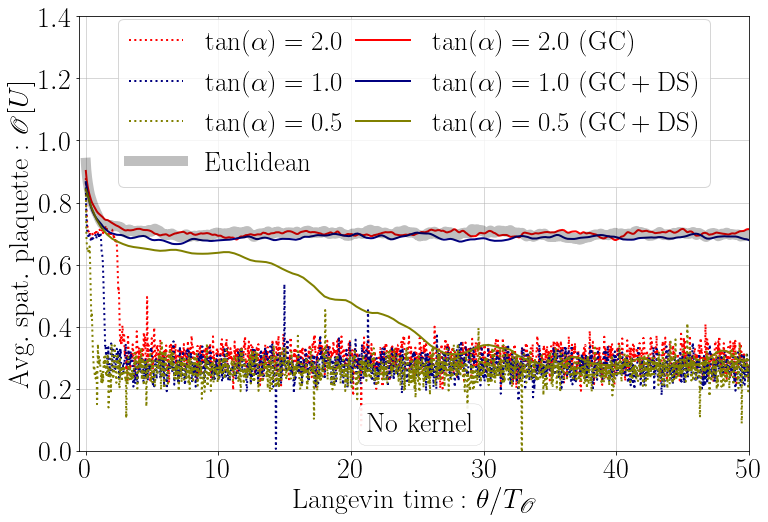

In [7]:
plt.figure(figsize=(12, 8))
fontsize = 28

for sim_name in dict_results.keys():
    th = dict_results[sim_name]["theta"]
    plaq = dict_results[sim_name]["tr_avg_spat_plaq"].real

    plt.plot(th/acl[sim_name], plaq, **plt_args[sim_name])

plt.legend(ncol=2, loc="upper center", fontsize=fontsize-1, columnspacing=0.5, bbox_to_anchor=(0.5,1.025))

plt.ylim(0.0,1.4)
plt.xlim(-0.5, 50)

plt.xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)
plt.ylabel("$\\mathrm{Avg.}~\\mathrm{spat.}~\\mathrm{plaquette:}~\mathscr{O}[U]$", fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.grid(linewidth=0.5)

textstr = r"$\mathrm{No}~\mathrm{kernel}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
plt.text(25.25, 0.085, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')

# plt.savefig("figure2a.pdf", bbox_inches='tight', dpi=1200, transparent=True)

plt.show()


# Figure 2 b)

In [8]:
res_keys = [
    "theta",
    "tr_avg_spat_plaq",
]

In [9]:
acl = {}
acl["euclidean"] = 0.35
acl["tan2_gc_gamma"] = 0.26
acl["tan1_gc_gamma"] = 0.66
acl["tan05_gc_gamma"] = 0.93

In [10]:
dict_results = {}
sim_names = ["tan2_gc_gamma", "tan1_gc_gamma", "tan05_gc_gamma", "euclidean"]
figure_path = "./figure2"

for sim_name in sim_names:
    dict_results[sim_name] = {}
    for res_key in res_keys:
        dict_results[sim_name][res_key] = np.load(f"{figure_path}/{sim_name}_{res_key}.npy")

In [11]:
for sim_name in tqdm(sim_names):
    th = dict_results[sim_name]["theta"]
    plaq = dict_results[sim_name]["tr_avg_spat_plaq"]

    if "unstable" not in sim_name:
        th, plaq = moving_average(th, plaq, abs_step_size=0.01, abs_win_size=0.05)
    else:
        th, plaq = moving_average(th, plaq, abs_step_size=0.01, abs_win_size=0.05)

    dict_results[sim_name]["theta"] = th
    dict_results[sim_name]["tr_avg_spat_plaq"] = plaq

100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


In [12]:
plt_args = {}
lw=2
plt_args["euclidean"] = {"label": r"$\mathrm{Euclidean}$", "c": "k", "ls": "solid", "zorder": 10, "linewidth": 10, "alpha": 0.25}
plt_args["tan2_gc_gamma"] = {"label": r"$\tan(\alpha)=2.0 ~ \mathrm{(GC + \Gamma(16))}$", "c": "red", "ls": "solid", "linewidth": lw}
plt_args["tan1_gc_gamma"] = {"label": r"$\tan(\alpha)=1.0 ~ \mathrm{(GC + \Gamma(64))}$", "c": "navy", "ls": "solid", "linewidth": lw}
plt_args["tan05_gc_gamma"] = {"label": r"$\tan(\alpha)=0.5 ~ \mathrm{(GC + \Gamma(1024))}$", "c": "olive", "ls": "solid", "linewidth": lw}

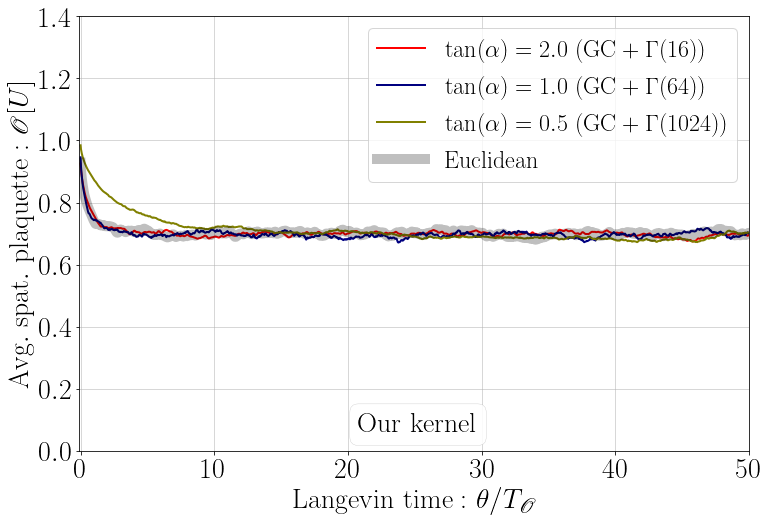

In [13]:
plt.figure(figsize=(12, 8))
fontsize = 28

for sim_name in dict_results.keys():
    th = dict_results[sim_name]["theta"]
    plaq = dict_results[sim_name]["tr_avg_spat_plaq"].real

    if "05" in sim_name:
        plaq+=0.002
    plt.plot(th/acl[sim_name], plaq, **plt_args[sim_name])

plt.legend(ncol=1, loc=1, fontsize=24)

plt.ylim(0.0,1.4)
plt.xlim(-0.1, 50)

plt.xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)
plt.ylabel("$\\mathrm{Avg.}~\\mathrm{spat.}~\\mathrm{plaquette:}~\mathscr{O}[U]$", fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.grid(linewidth=0.5)

textstr = r"$\mathrm{Our}~\mathrm{kernel}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
plt.text(25.25, 0.085, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')

# plt.savefig("figure2b.pdf", bbox_inches='tight', dpi=1200, transparent=True)

plt.show()


# Figure 3

In [14]:
figure_path = "./figure3"

sim_name = "tan1_GC_64"
th_64 = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_64 = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real

sim_name = "tan05_GC_1024"
th_1024 = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_1024 = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real

sim_name = "tan1_GC+Gamma_64"
th_gamma_64 = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_gamma_64 = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real

sim_name = "tan05_GC+Gamma_1024"
th_gamma_1024 = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_gamma_1024 = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real

sim_name = "euclidean"
th_eucl = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_eucl = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real


sim_name = "unstable_tan1"
th_nostab_1 = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_nostab_1 = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real


sim_name = "unstable_tan05"
th_nostab_05 = np.load(f"{figure_path}/{sim_name}_theta.npy")
obs_nostab_05 = np.load(f"{figure_path}/{sim_name}_tr_avg_spat_plaq.npy").real

In [15]:
from matplotlib.lines import Line2D
cm = plt.get_cmap("inferno")

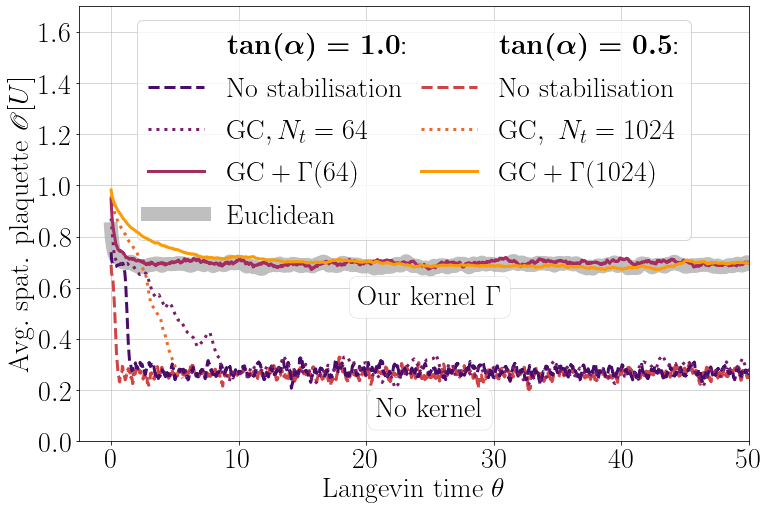

In [16]:
plt.figure(figsize=(12, 8))
fontsize = 28
lw = 1
n=9

plt.plot(th_nostab_1, obs_nostab_1, c=cm(2/n), ls="dashed", lw=3, zorder=3)
plt.plot(th_64, obs_64 / 2, c=cm(3/n), ls="dotted", lw=3, zorder=4)
plt.plot(th_gamma_64, obs_gamma_64, c=cm(4/n), lw=3, zorder=6)

plt.plot(th_nostab_05, obs_nostab_05, c=cm(5/n), ls="dashed", lw=3, zorder=2)
plt.plot(th_1024, obs_1024 / 2, c=cm(6/n), ls="dotted", lw=3, zorder=5)
plt.plot(th_gamma_1024, obs_gamma_1024, c=cm(7/n), lw=3, zorder=7)
plt.plot(th_eucl, obs_eucl, label="Euclidean", lw=14, c="k", zorder=1, alpha=0.25)


legend_elements = [
    Line2D([0], [0], color='white', ls="dashed", lw=3, label="$\\boldsymbol{\\tan(\\alpha)=1.0}$:"),
    Line2D([0], [0], color=cm(2/n), ls="dashed", lw=3, label="$\mathrm{No}$ $\mathrm{stabilisation}$"),
    Line2D([0], [0], color=cm(3/n), ls="dotted", lw=3, label="$\mathrm{GC}, N_t=64$"),
    Line2D([0], [0], color=cm(4/n), ls="solid", lw=3, label="$\mathrm{GC}+\Gamma(64)$"),
    Line2D([0], [0], color='k', ls="solid", lw=14, alpha=0.25, label="$\mathrm{Euclidean}$"),
    Line2D([0], [0], color='white', ls="dashed", lw=3, label="$\\boldsymbol{\\tan(\\alpha)=0.5}$:"),
    Line2D([0], [0], color=cm(5/n), ls="dashed", lw=3, label="$\mathrm{No}$ $\mathrm{stabilisation}$"),
    Line2D([0], [0], color=cm(6/n), ls="dotted", lw=3, label="$\mathrm{GC},~N_t=1024$"),
    Line2D([0], [0], color=cm(7/n), ls="solid", lw=3, label="$\mathrm{GC}+\Gamma(1024)$"),
]

plt.legend(handles=legend_elements, ncol=2, loc="upper center", fontsize=fontsize, columnspacing=0.5, fancybox=True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid(lw=0.5)

plt.xlim(-2.5, 50)
plt.ylim(0, 1.7)
# plt.ylim(0, 1.6)

plt.xlabel("$\mathrm{Langevin}$ $\mathrm{time}$ $\\theta$", fontsize=fontsize)
plt.ylabel("$\mathrm{Avg}.$ $\mathrm{spat}$. $\mathrm{plaquette}$ $\mathscr{O}[U]$", fontsize=fontsize)

textstr = r"$\mathrm{Our}~\mathrm{kernel}~\Gamma$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
plt.text(25, 0.5625, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')

textstr = r"$\mathrm{No}~\mathrm{kernel}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
plt.text(25, 0.125, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')


# plt.savefig("figure3.pdf", bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Figure 4

In [17]:
res_keys = [
    "theta",
    "ds_spat_lhs",
    "ds_spat_rhs",
]

In [18]:
dict_results = {}
sim_names = ["unstable_tan1","tan1_gc_gamma", "unstable_tan05","tan05_gc_gamma"]
figure_path = "./figure4"

for sim_name in sim_names:
    dict_results[sim_name] = {}
    for res_key in res_keys:
        dict_results[sim_name][res_key] = np.load(f"{figure_path}/{sim_name}_{res_key}.npy")


In [19]:
acl = {}
acl["tan1_gc_gamma"] = 0.66
acl["unstable_tan1"] = 1.0
acl["tan05_gc_gamma"] = 1.2
acl["unstable_tan05"] = 1.0


In [20]:
for sim_name in tqdm(sim_names):
    th = dict_results[sim_name]["theta"]
    lhs = dict_results[sim_name]["ds_spat_lhs"]
    rhs = dict_results[sim_name]["ds_spat_rhs"]

    _, lhs = moving_average(th, lhs, abs_step_size=0.01, abs_win_size=0.1)
    th, rhs = moving_average(th, rhs, abs_step_size=0.01, abs_win_size=0.1)

    dict_results[sim_name]["theta"] = th
    dict_results[sim_name]["ds_spat_lhs"] = lhs
    dict_results[sim_name]["ds_spat_rhs"] = rhs

100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


In [21]:
plt_args_lhs = {}
plt_args_rhs = {}
lw=3
plt_args_lhs["tan1_gc_gamma"] = {"label": r"$\mathrm{LHS:}~\tan(\alpha)=1.0$", "c": "navy", "ls": "solid", "lw": lw}
plt_args_rhs["tan1_gc_gamma"] = {"label": r"$\mathrm{RHS:}~\tan(\alpha)=1.0$", "c": "red", "ls": "dashed", "lw": lw}
plt_args_lhs["unstable_tan1"] = {"c": "navy", "ls": "solid", "zorder": 10000, "lw": lw}
plt_args_rhs["unstable_tan1"] = {"c": "red", "ls": "dashed", "lw": lw}
plt_args_lhs["tan05_gc_gamma"] = {"label": r"$\mathrm{LHS:}~\tan(\alpha)=0.5$", "c": "olive", "ls": "solid", "lw": lw}
plt_args_rhs["tan05_gc_gamma"] = {"label": r"$\mathrm{RHS:}~\tan(\alpha)=0.5$", "c": "orange", "ls": "dashed", "lw": lw}
plt_args_lhs["unstable_tan05"] = {"c": "olive", "ls": "solid", "zorder": 1000, "lw": lw}
plt_args_rhs["unstable_tan05"] = {"c": "orange", "ls": "dashed", "lw": lw}

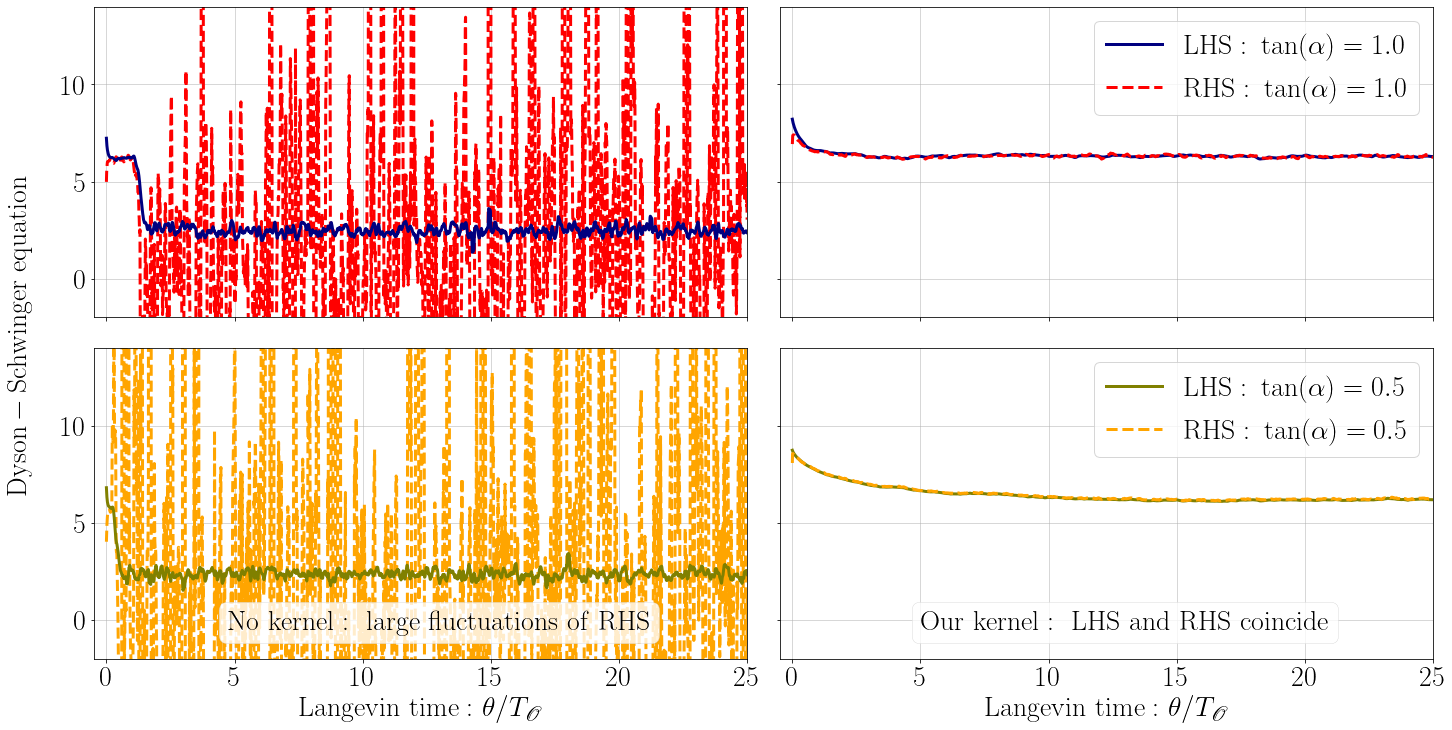

In [22]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[24,12])

sim_name = "unstable_tan1"
ax_i = 0

th = dict_results[sim_name]["theta"]
lhs = dict_results[sim_name]["ds_spat_lhs"].real
rhs = dict_results[sim_name]["ds_spat_rhs"].real

axs[0,0].plot(th/acl[sim_name], lhs, **plt_args_lhs[sim_name])
axs[0,0].plot(th/acl[sim_name], rhs, **plt_args_rhs[sim_name])

sim_name = "tan1_gc_gamma"

th = dict_results[sim_name]["theta"]
lhs = dict_results[sim_name]["ds_spat_lhs"].real
rhs = dict_results[sim_name]["ds_spat_rhs"].real

axs[0,1].plot(th/acl[sim_name], lhs, **plt_args_lhs[sim_name])
axs[0,1].plot(th/acl[sim_name], rhs, **plt_args_rhs[sim_name])

sim_name = "unstable_tan05"
ax_i = 0

th = dict_results[sim_name]["theta"]
lhs = dict_results[sim_name]["ds_spat_lhs"].real
rhs = dict_results[sim_name]["ds_spat_rhs"].real

axs[1,0].plot(th/acl[sim_name], lhs, **plt_args_lhs[sim_name])
axs[1,0].plot(th/acl[sim_name], rhs, **plt_args_rhs[sim_name])

sim_name = "tan05_gc_gamma"

th = dict_results[sim_name]["theta"]
lhs = dict_results[sim_name]["ds_spat_lhs"].real
rhs = dict_results[sim_name]["ds_spat_rhs"].real

axs[1,1].plot(th/acl[sim_name], lhs, **plt_args_lhs[sim_name])
axs[1,1].plot(th/acl[sim_name], rhs, **plt_args_rhs[sim_name])

#####
#####

fontsize = 28

axs[0,1].legend(loc=1, fontsize=fontsize)
axs[1,1].legend(loc=1, fontsize=fontsize)

axs[0,0].set_ylim(-2,14)
axs[1,0].set_ylim(-2,14)

axs[0,0].set_xlim(-0.5,25)
axs[1,0].set_xlim(-0.5,25)
axs[0,1].set_xlim(-0.5,25)
axs[1,1].set_xlim(-0.5,25)

axs[0,0].grid(linewidth=0.5)
axs[1,0].grid(linewidth=0.5)
axs[0,1].grid(linewidth=0.5)
axs[1,1].grid(linewidth=0.5)

axs[0,1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1,1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1,0].set_xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)
axs[1,1].set_xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)

axs[0,0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1,0].tick_params(axis='both', which='major', labelsize=fontsize)
#axs[0,0].set_ylabel("Dyson-Schwinger equation", fontsize=fontsize)
#axs[1,0].set_ylabel("Dyson-Schwinger equation", fontsize=fontsize)

plt.subplots_adjust(wspace=0.05, hspace=0.1)
fig.text(0.075, 0.5, "$\\mathrm{Dyson-Schwinger~equation}$", va='center', rotation='vertical', fontsize=fontsize)


textstr = r"$\mathrm{No~kernel:~large~fluctuations~of~RHS}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.8, lw=0.25)
axs[1, 0].text(13, -0.5, textstr, fontsize=fontsize, ha='center', bbox=props, style='italic')


textstr = r"$\mathrm{Our~kernel:~LHS~and~RHS~coincide}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.8, lw=0.25)
axs[1, 1].text(13, -0.5, textstr, fontsize=fontsize, ha='center', bbox=props, style='italic')

#####
#####

# plt.savefig("figure4.pdf", bbox_inches='tight', dpi=1200, transparent=True)
plt.show()


# Figure 5

In [23]:
res_keys = [
    "theta",
    "unorm",
]

In [24]:
dict_results = {}
sim_names = ["unstable_tan1","tan1_gc_gamma", "unstable_tan05","tan05_gc_gamma"]
figure_path = "./figure5"

for sim_name in sim_names:
    dict_results[sim_name] = {}
    for res_key in res_keys:
        dict_results[sim_name][res_key] = np.load(f"{figure_path}/{sim_name}_{res_key}.npy")


In [25]:
acl = {}
acl["tan1_gc_gamma"] = 0.66
acl["unstable_tan1"] = 1.0
acl["tan05_gc_gamma"] = 1.2
acl["unstable_tan05"] = 1.0


In [26]:
for sim_name in tqdm(sim_names):
    th = dict_results[sim_name]["theta"]
    un = dict_results[sim_name]["unorm"]

    th, un = moving_average(th, un, abs_step_size=0.01, abs_win_size=0.1)

    dict_results[sim_name]["theta"] = th
    dict_results[sim_name]["unorm"] = un

100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


In [27]:
plt_args = {}
plt_args = {}
lw = 3
plt_args["tan1_gc_gamma"] = {"label": r"$\tan(\alpha)=1.0$", "c": "navy", "ls": "solid", "lw": lw}
plt_args["unstable_tan1"] = {"c": "navy", "ls": "solid", "zorder": 10000, "lw": lw}
plt_args["tan05_gc_gamma"] = {"label": r"$\tan(\alpha)=0.5$", "c": "olive", "ls": "solid", "lw": lw}
plt_args["unstable_tan05"] = {"c": "olive", "ls": "solid", "zorder": 10000, "lw": lw}

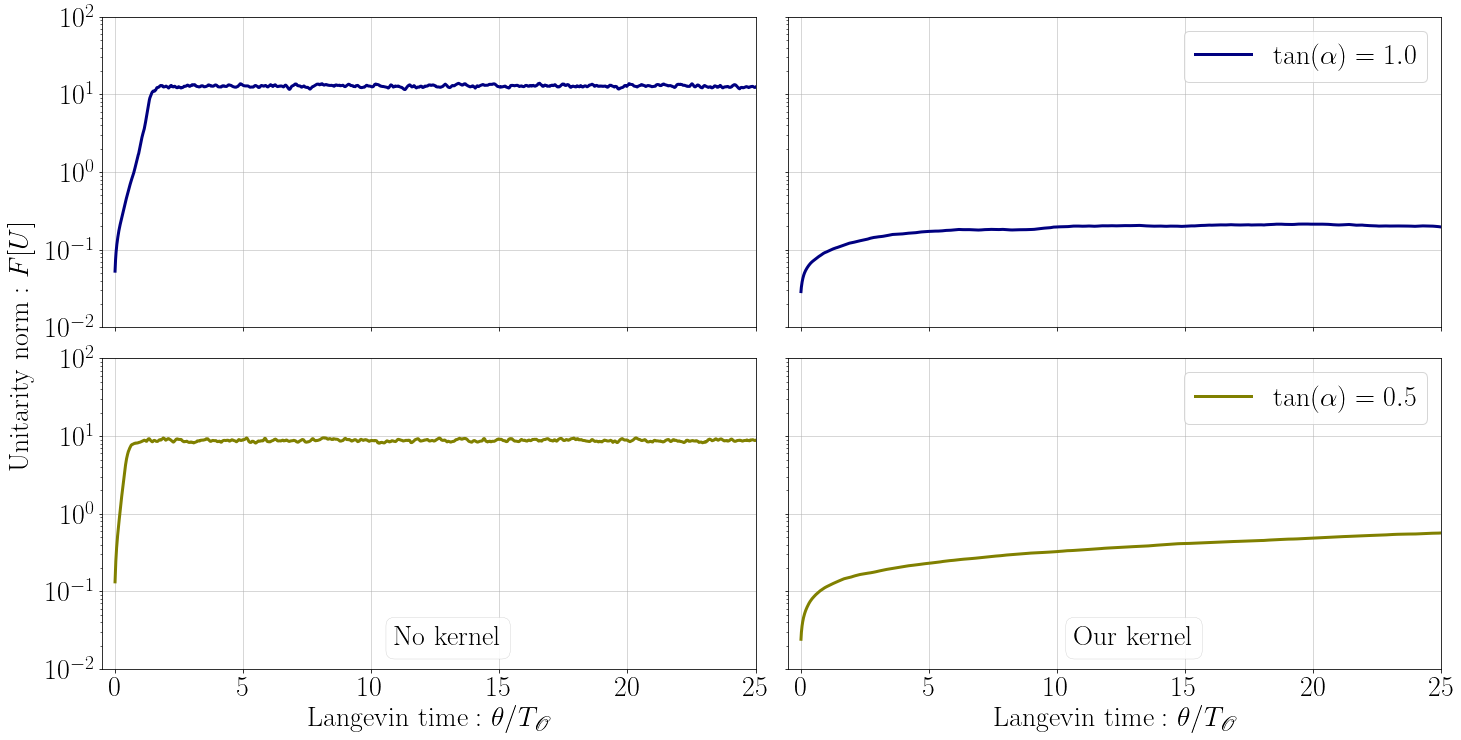

In [28]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[24,12])

sim_name = "unstable_tan1"
ax_i = 0

th = dict_results[sim_name]["theta"]
un = dict_results[sim_name]["unorm"].real

axs[0,0].plot(th/acl[sim_name], un, **plt_args[sim_name])

sim_name = "tan1_gc_gamma"

th = dict_results[sim_name]["theta"]
un = dict_results[sim_name]["unorm"].real

axs[0,1].plot(th/acl[sim_name], un, **plt_args[sim_name])

sim_name = "unstable_tan05"
ax_i = 0

th = dict_results[sim_name]["theta"]
un = dict_results[sim_name]["unorm"].real

axs[1,0].plot(th/acl[sim_name], un, **plt_args[sim_name])

sim_name = "tan05_gc_gamma"

th = dict_results[sim_name]["theta"]
un = dict_results[sim_name]["unorm"].real

axs[1,1].plot(th/acl[sim_name], un, **plt_args[sim_name])

#####
#####

fontsize = 28

axs[0,1].legend(loc=1, fontsize=fontsize)
axs[1,1].legend(loc=1, fontsize=fontsize)

axs[0,0].set_ylim(1e-2,1e2)
axs[1,0].set_ylim(1e-2,1e2)

axs[0,0].set_yscale("log")
axs[1,0].set_yscale("log")

axs[0,0].set_xlim(-0.5,25)
axs[1,0].set_xlim(-0.5,25)
axs[0,1].set_xlim(-0.5,25)
axs[1,1].set_xlim(-0.5,25)

axs[0,0].grid(linewidth=0.5)
axs[1,0].grid(linewidth=0.5)
axs[0,1].grid(linewidth=0.5)
axs[1,1].grid(linewidth=0.5)

axs[0,1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1,1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1,0].set_xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)
axs[1,1].set_xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)

axs[0,0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1,0].tick_params(axis='both', which='major', labelsize=fontsize)
#axs[0,0].set_ylabel("Dyson-Schwinger equation", fontsize=fontsize)
#axs[1,0].set_ylabel("Dyson-Schwinger equation", fontsize=fontsize)

plt.subplots_adjust(wspace=0.05, hspace=0.1)
fig.text(0.07, 0.5, "$\\mathrm{Unitarity}~\mathrm{norm:}~F[U]$", va='center', rotation='vertical', fontsize=fontsize)

textstr = r"$\mathrm{No}~\mathrm{kernel}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
axs[1, 0].text(13, 0.025, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')

textstr = r"$\mathrm{Our}~\mathrm{kernel}$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
axs[1, 1].text(13, 0.025, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')

#####
#####

# plt.savefig("figure5.pdf", bbox_inches='tight', dpi=1200, transparent=True)
plt.show()


# Figure 6 - $\tan(\alpha)=0.4$

In [29]:
res_keys = [
    "theta",
    "unorm",
    "tr_avg_spat_plaq",
]

In [30]:
dict_results = {}
sim_names = ["tan04_nt2048", "tan04_nt4096", "tan04_nt8192", "euclidean"]
figure_path = "./figure6"

for sim_name in sim_names:
    dict_results[sim_name] = {}
    for res_key in res_keys:
        dict_results[sim_name][res_key] = np.load(f"{figure_path}/{sim_name}_{res_key}.npy")


In [31]:
for sim_name in tqdm(sim_names):
    th = dict_results[sim_name]["theta"]
    plaq = dict_results[sim_name]["tr_avg_spat_plaq"]
    unorm = dict_results[sim_name]["unorm"]

    _, plaq = moving_average(th, plaq, abs_step_size=0.01, abs_win_size=0.1)
    th, unorm = moving_average(th, unorm, abs_step_size=0.01, abs_win_size=0.1)

    dict_results[sim_name]["theta"] = th
    dict_results[sim_name]["tr_avg_spat_plaq"] = plaq
    dict_results[sim_name]["unorm"] = unorm

100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


In [32]:
plt_args = {}
lw=3
plt_args["tan04_nt2048"] = {"label": r"$\Gamma(2048)$", "c": "red", "ls": "solid", "lw": lw}
plt_args["tan04_nt4096"] = {"label": r"$\Gamma(4096)$", "c": "olive", "ls": "solid", "lw": lw}
plt_args["tan04_nt8192"] = {"label": r"$\Gamma(8192)$", "c": "navy", "ls": "solid", "lw": lw}
plt_args["euclidean"] = {"label": "Euclidean", "c": "k", "ls": "solid", "zorder": 10, "linewidth": 10, "alpha": 0.25}

In [33]:
th_2048 = dict_results["tan04_nt2048"]["theta"]
th_4096 = dict_results["tan04_nt4096"]["theta"]
th_8192 = dict_results["tan04_nt8192"]["theta"]
th_eucl = dict_results["euclidean"]["theta"]

obs_2048 = dict_results["tan04_nt2048"]["tr_avg_spat_plaq"].real
obs_4096 = dict_results["tan04_nt4096"]["tr_avg_spat_plaq"].real
obs_8192 = dict_results["tan04_nt8192"]["tr_avg_spat_plaq"].real
obs_eucl = dict_results["euclidean"]["tr_avg_spat_plaq"].real

unorm_2048 = dict_results["tan04_nt2048"]["unorm"].real
unorm_4096 = dict_results["tan04_nt4096"]["unorm"].real
unorm_8192 = dict_results["tan04_nt8192"]["unorm"].real
unorm_eucl = dict_results["euclidean"]["unorm"].real

acl_2048 = 0.51
acl_4096 = 0.65
acl_8192 = 0.85
acl_eucl = 0.32

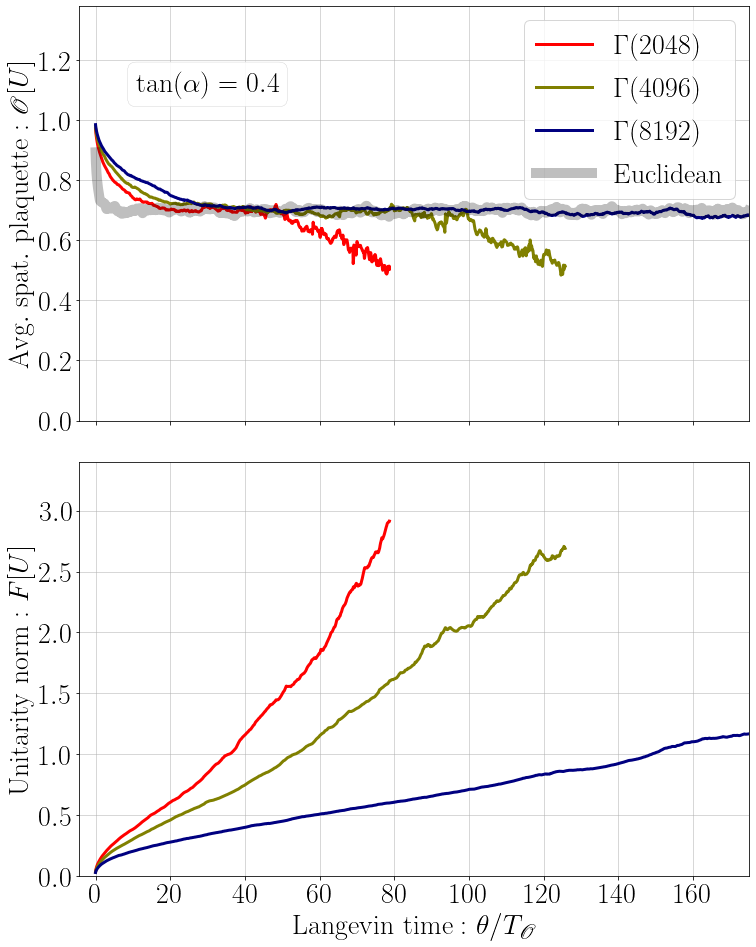

In [34]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=[12,16], gridspec_kw={'height_ratios': [1, 1]})
lw = 3
ax_i = axs[0]

ax_i.plot(th_2048 / acl_2048, obs_2048, label="$\Gamma(2048)$", lw=lw, c="red")
ax_i.plot(th_4096 / acl_4096, obs_4096, label="$\Gamma(4096)$", lw=lw, c="olive")
ax_i.plot(th_8192 / acl_8192, obs_8192, label="$\Gamma(8192)$", lw=lw, c="navy")
ax_i.plot(th_eucl / acl_eucl, obs_eucl, label="$\\mathrm{Euclidean}$", lw=10, c="k", zorder=10, alpha=0.25)

ax_i = axs[1]

ax_i.plot(th_2048 / acl_2048, unorm_2048, label="$\Gamma(2048)$", lw=lw, c="red")
ax_i.plot(th_4096 / acl_4096, unorm_4096, label="$\Gamma(4096)$", lw=lw, c="olive")
ax_i.plot(th_8192 / acl_8192, unorm_8192, label="$\Gamma(8192)$", lw=lw, c="navy")

#####
#####

fontsize = 28

ax_i = axs[0]
ax_i.legend(loc=1, fontsize=fontsize)
ax_i.set_ylim(0, 1.38)
ax_i.set_yscale("linear")
ax_i.set_xlim(-2.5, 175)
ax_i.grid(linewidth=0.5)
ax_i.tick_params(axis='both', which='major', labelsize=fontsize)
ax_i.set_yticks([0.0,0.2, 0.4,0.6, 0.8, 1.0, 1.2])
ax_i.set_ylabel("$\\mathrm{Avg.}~\\mathrm{spat.}~\\mathrm{plaquette:}~\mathscr{O}[U]$", fontsize=fontsize)

textstr = r"$\tan(\alpha)=0.4$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
ax_i.text(30, 28/25, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')


ax_i = axs[1]
# ax_i.legend(loc=1, fontsize=fontsize)
ax_i.set_ylim(0, 3.4)
ax_i.set_yscale("linear")
ax_i.set_xlim(-2.5*175/100, 175)
ax_i.grid(linewidth=0.5)
ax_i.tick_params(axis='both', which='major', labelsize=fontsize)
ax_i.set_xticks([0,20,40,60,80,100, 120,140,160])
ax_i.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
ax_i.set_xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)
ax_i.set_ylabel("$\\mathrm{Unitarity~norm:}~F[U]$", fontsize=fontsize)

plt.subplots_adjust(wspace=0.05, hspace=0.1)

#####
#####

# plt.savefig("figure6_tan04.pdf", bbox_inches='tight', dpi=1200, transparent=True)
plt.show()


# Figure 6 - $\tan(\alpha)=0.5$

In [35]:
res_keys = [
    "theta",
    "unorm",
    "tr_avg_spat_plaq",
]

In [36]:
dict_results = {}
sim_names = ["tan05_nt64", "tan05_nt256", "tan05_nt1024", "euclidean"]
figure_path = "./figure6"

for sim_name in sim_names:
    dict_results[sim_name] = {}
    for res_key in res_keys:
        dict_results[sim_name][res_key] = np.load(f"{figure_path}/{sim_name}_{res_key}.npy")


In [37]:
for sim_name in tqdm(sim_names):
    th = dict_results[sim_name]["theta"]
    plaq = dict_results[sim_name]["tr_avg_spat_plaq"]
    unorm = dict_results[sim_name]["unorm"]

    _, plaq = moving_average(th, plaq, abs_step_size=0.01, abs_win_size=0.1)
    th, unorm = moving_average(th, unorm, abs_step_size=0.01, abs_win_size=0.1)

    dict_results[sim_name]["theta"] = th
    dict_results[sim_name]["tr_avg_spat_plaq"] = plaq
    dict_results[sim_name]["unorm"] = unorm

100%|██████████| 4/4 [00:10<00:00,  2.65s/it]


In [38]:
plt_args = {}
lw=3
plt_args["tan05_nt64"] = {"label": r"$\Gamma(64)$", "c": "red", "ls": "solid", "lw": lw}
plt_args["tan05_nt256"] = {"label": r"$\Gamma(256)$", "c": "olive", "ls": "solid", "lw": lw}
plt_args["tan05_nt1024"] = {"label": r"$\Gamma(1024)$", "c": "navy", "ls": "solid", "lw": lw}
plt_args["euclidean"] = {"label": "Euclidean", "c": "k", "ls": "solid", "zorder": 10, "linewidth": 10, "alpha": 0.25}

In [39]:
th_64 = dict_results["tan05_nt64"]["theta"]
th_256 = dict_results["tan05_nt256"]["theta"]
th_1024 = dict_results["tan05_nt1024"]["theta"]
th_eucl = dict_results["euclidean"]["theta"]

obs_64 = dict_results["tan05_nt64"]["tr_avg_spat_plaq"].real / 2.0
obs_256 = dict_results["tan05_nt256"]["tr_avg_spat_plaq"].real / 2.0
obs_1024 = dict_results["tan05_nt1024"]["tr_avg_spat_plaq"].real
obs_eucl = dict_results["euclidean"]["tr_avg_spat_plaq"].real

unorm_64 = dict_results["tan05_nt64"]["unorm"].real
unorm_256 = dict_results["tan05_nt256"]["unorm"].real
unorm_1024 = dict_results["tan05_nt1024"]["unorm"].real
unorm_eucl = dict_results["euclidean"]["unorm"].real

acl_64 = 0.32
acl_256 = 0.44
acl_1024 = 0.93
acl_eucl = 0.32


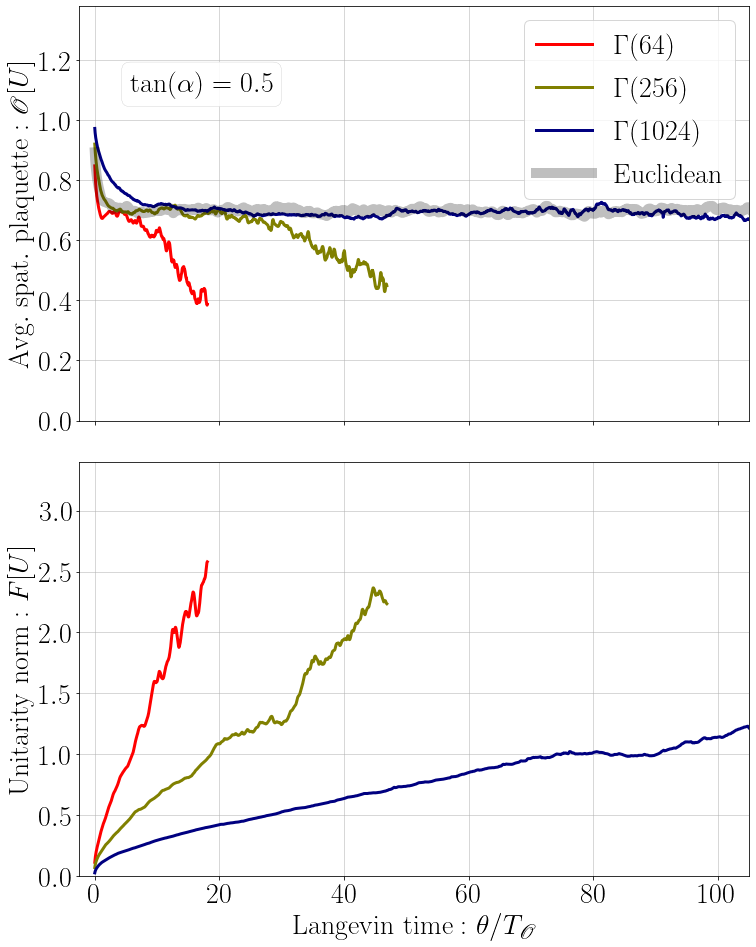

In [40]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=[12,16], gridspec_kw={'height_ratios': [1, 1]})
lw=3
ax_i = axs[0]

ax_i.plot(th_64 / acl_64, obs_64, label="$\Gamma(64)$", lw=lw, c="red")
ax_i.plot(th_256 / acl_256, obs_256, label="$\Gamma(256)$", lw=lw, c="olive")
ax_i.plot(th_1024 / acl_1024, obs_1024, label="$\Gamma(1024)$", lw=lw, c="navy")
ax_i.plot(th_eucl / acl_eucl, obs_eucl, label="$\mathrm{Euclidean}$", lw=10, c="k", zorder=10, alpha=0.25)

ax_i = axs[1]

ax_i.plot(th_64 / acl_64, unorm_64, label="$\Gamma(64)$", lw=lw, c="red")
ax_i.plot(th_256 / acl_256, unorm_256, label="$\Gamma(256)$", lw=lw, c="olive")
ax_i.plot(th_1024 / acl_1024, unorm_1024, label="$\Gamma(1024)$", lw=lw, c="navy")

#####
#####

fontsize = 28

ax_i = axs[0]
ax_i.legend(loc=1, fontsize=fontsize)
ax_i.set_ylim(0, 1.38)
ax_i.set_yscale("linear")
ax_i.set_xlim(-0.5,100)
ax_i.grid(linewidth=0.5)
ax_i.tick_params(axis='both', which='major', labelsize=fontsize)
ax_i.set_yticks([0.0,0.2, 0.4,0.6, 0.8, 1.0, 1.2])
ax_i.set_ylabel("$\\mathrm{Avg.}~\\mathrm{spat.}~\\mathrm{plaquette:}~\mathscr{O}[U]$", fontsize=fontsize)

textstr = r"$\tan(\alpha)=0.5$"
props = dict(boxstyle='round', edgecolor='darkgrey', facecolor='white', alpha=0.9, lw=0.25)
ax_i.text(30*100/175, 28/25, textstr, fontsize=fontsize, ha='center', va='center', bbox=props, style='italic')


ax_i = axs[1]
# ax_i.legend(loc=1, fontsize=fontsize)
ax_i.set_ylim(0, 3.4)
ax_i.set_yscale("linear")
ax_i.set_xlim(-2.5,105)
ax_i.grid(linewidth=0.5)
ax_i.set_xticks([0,20,40,60,80, 100])
ax_i.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

ax_i.tick_params(axis='both', which='major', labelsize=fontsize)
ax_i.set_xlabel("$\\mathrm{Langevin}~\\mathrm{time:}~\\theta/T_{\mathscr{O}}$", fontsize=fontsize)
ax_i.set_ylabel("$\\mathrm{Unitarity~norm:}~F[U]$", fontsize=fontsize)

plt.subplots_adjust(wspace=0.05, hspace=0.1)

# plt.savefig("figure6_tan05.pdf", bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Figure 7

In [41]:
sim_names = ["no_stabilization", "GC", "GC+Gamma16", "GC+Gamma64", "GC+Gamma256"]
res_keys = ["drift_bin_edges", "re_drift_hist", "im_drift_hist"]
dict_results = {}
figure_path = "./figure7"

for sn in sim_names:
    dict_results[sn] = {}
    for rk in res_keys:
        dict_results[sn][rk] = np.load(f"{figure_path}/{sn}_{rk}.npy")

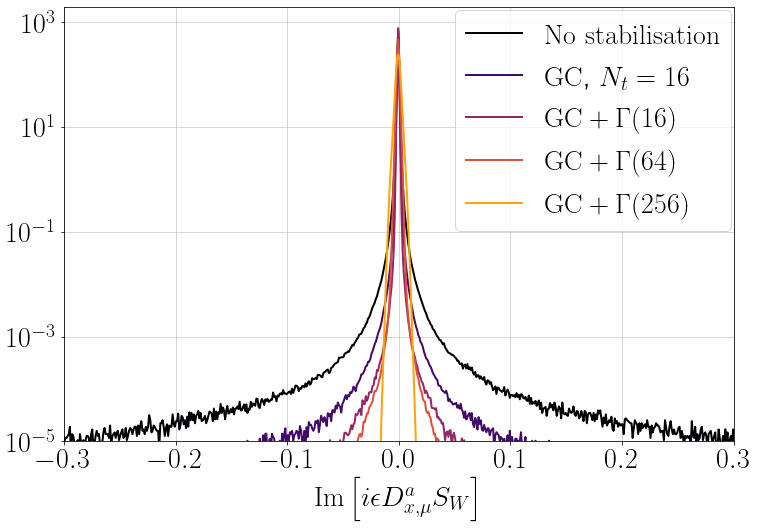

In [42]:
plt.figure(figsize=(12, 8))
fontsize = 28

zorders = [1000, 2, 3, 5, 1000]
sim_keys = [r"no_stabilization", r"GC", r"GC+Gamma16", r"GC+Gamma64", r"GC+Gamma256"]

lw=2
plt_args = {}
plt_args["no_stabilization"] = {"label": r"$\mathrm{No}$ $\mathrm{stabilisation}$", "lw": lw}
plt_args["GC"] = {"label": r"$\mathrm{GC}$, $N_t=16$", "lw": lw}
plt_args["GC+Gamma16"] = {"label": r"$\mathrm{GC}+\Gamma(16)$", "lw": lw}
plt_args["GC+Gamma64"] = {"label": r"$\mathrm{GC}+\Gamma(64)$", "lw": lw}
plt_args["GC+Gamma256"] = {"label": r"$\mathrm{GC}+\Gamma(256)$", "lw": lw}

cm = plt.get_cmap("inferno")
n = len(sim_keys)
for i, sim_name in enumerate(sim_keys):
    re_drift_hist = dict_results[sim_name]["re_drift_hist"]
    drift_bin_edges = dict_results[sim_name]["drift_bin_edges"]
    norm=np.trapz(y=re_drift_hist, x=drift_bin_edges[:-1])

    plt_args[sim_name]["color"] = cm(i/n)
    plt.plot(drift_bin_edges[:-1], re_drift_hist / norm, **plt_args[sim_name])

plt.xlim(-0.3, 0.3)
plt.yscale("log")
plt.ylim(1e-5, 2*1e3)

plt.grid(linewidth=0.5)
plt.legend(ncol=1, loc=1, fontsize=fontsize, bbox_to_anchor=(1.0175, 1.025))
plt.xlabel("$\mathrm{Im} \\left[ i \epsilon D_{x,\mu}^a S_W\\right]$", fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# plt.savefig("figure7_un.pdf", bbox_inches='tight', dpi=1200, facecolor="white")
plt.show()


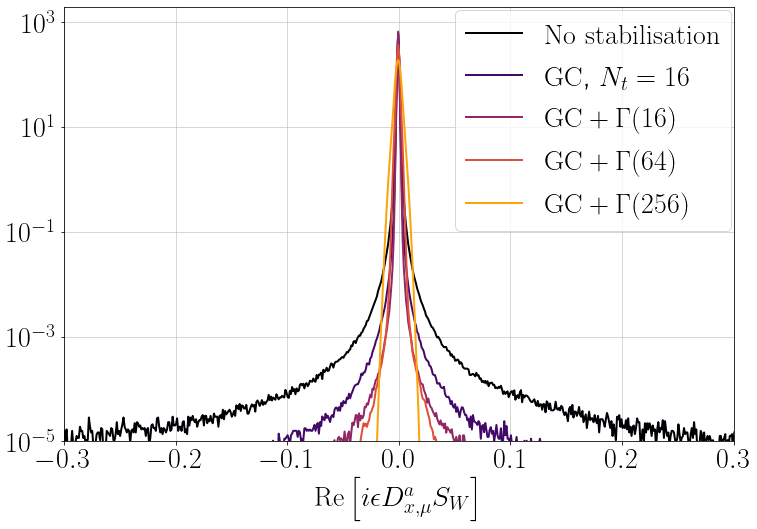

In [43]:
plt.figure(figsize=(12, 8))
fontsize = 28

zorders = [1000, 2, 3, 5, 1000]
sim_keys = [r"no_stabilization", r"GC", r"GC+Gamma16", r"GC+Gamma64", r"GC+Gamma256"]
lw=2
plt_args = {}
plt_args["no_stabilization"] = {"label": r"$\mathrm{No}$ $\mathrm{stabilisation}$", "lw": lw}
plt_args["GC"] = {"label": r"$\mathrm{GC}$, $N_t=16$", "lw": lw}
plt_args["GC+Gamma16"] = {"label": r"$\mathrm{GC}+\Gamma(16)$", "lw": lw}
plt_args["GC+Gamma64"] = {"label": r"$\mathrm{GC}+\Gamma(64)$", "lw": lw}
plt_args["GC+Gamma256"] = {"label": r"$\mathrm{GC}+\Gamma(256)$", "lw": lw}

cm = plt.get_cmap("inferno")
n = len(sim_keys)
for i, sim_name in enumerate(sim_keys):
    im_drift_hist = dict_results[sim_name]["im_drift_hist"]
    drift_bin_edges = dict_results[sim_name]["drift_bin_edges"]
    norm=np.trapz(y=im_drift_hist, x=drift_bin_edges[:-1])

    plt_args[sim_name]["color"] = cm(i/n)
    plt.plot(drift_bin_edges[:-1], im_drift_hist / norm, **plt_args[sim_name])

plt.xlim(-0.3, 0.3)
plt.ylim(1e-5, 2*1e3)
plt.yscale("log")

plt.grid(linewidth=0.5)
plt.legend(ncol=1, loc=1, fontsize=fontsize, bbox_to_anchor=(1.0175, 1.025))
plt.xlabel("$\mathrm{Re} \\left[ i \epsilon D_{x,\mu}^a S_W\\right]$", fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# plt.savefig("figure7_non-un.pdf", bbox_inches='tight', dpi=1200, facecolor="white")
plt.show()